In [8]:
import time
import numpy as np
import cvxpy as cp
import os.path as op

from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.graph_objects as go


import sys
sys.path.append("../")

from src import node_list
from src import nilearn_viz
from src import power_crtl
from src import pkl_custom
from src import plot_stat_on_surf

import networkx as nx

In [9]:
root_path = "../"

### Power Control

In [10]:
adj = pkl_custom.open_pkl_file(op.join(root_path, './resources/lausanne2018-info.pkl'))['adjacency']
graph = nx.from_numpy_array(adj)
assert nx.is_connected(graph)

In [13]:
# Re-Implementation
solutions = []
for seed_k in tqdm(np.arange(1000)):
    solver = power_crtl.PowerControl(adj, rand_p=True, seed_p=seed_k)
    solutions.append(solver.run())
solutions = np.array(solutions)

100%|██████████| 1000/1000 [00:21<00:00, 47.49it/s]


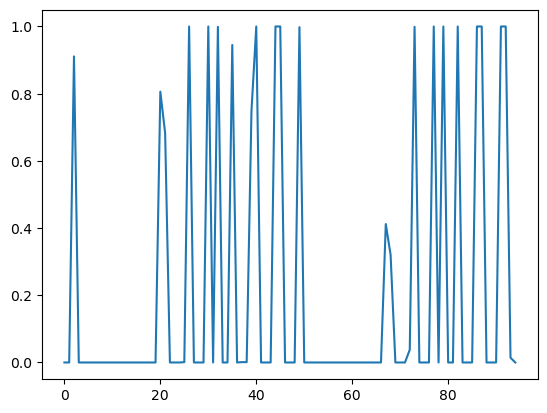

In [14]:
plt.plot(solutions.mean(axis=0))

In [15]:
solutions.mean(axis=0)

(95,)

In [ ]:
plot_stat_on_surf.plot_node_signal_on_surf()